In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Input Data

In [2]:
con = sqlite3.connect('../Dataset/hotel-directories-ORI.sqlite3')
df_room = pd.read_sql_query("SELECT * FROM hotel_rooms", con)
df_hotel = pd.read_sql_query("SELECT * FROM hotels", con)

In [3]:
df_room.to_csv('../Dataset/rooms.csv', index=False)
df_hotel.to_csv('../Dataset/hotels.csv', index=False)

In [4]:
df_room.head(2)

,id,hotelId,name,images,roomType,description,originalDescription,bedDescription,size,rate,...,numExtraBeds,numChargedRooms,numRemainingRooms,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,extraBedIsIncluded,facilities
0,1000009181,3000020003208,Family,"[""https://ik.imagekit.io/tvlk/generic-asset/dg...",Family,None,None,None,30.0,"{""amount"":""989182"",""currency"":""IDR"",""tax"":""207...",...,0,1,3,NaN,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."
1,1000009219,3000020003208,President Suite,"[""https://ik.imagekit.io/tvlk/generic-asset/dg...",President Suite,None,None,None,75.0,"{""amount"":""3272727"",""currency"":""IDR"",""tax"":""68...",...,0,1,1,NaN,1,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."


In [5]:
df_hotel.head(2)

,id,type,name,displayName,description,link,address,region,city,province,...,images,facilities,properties,nearestPointOfInterests,starRating,userRating,userRatingInfo,numReviews,latitude,longitude
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Kyriad Hotel Muraya Aceh,<p><b>Lokasi</b><br>Kyriad Hotel Muraya Aceh b...,https://www.traveloka.com/id-id/hotel/detail?s...,Jalan Tengku H. Mohd Daud Beureueuh No. 5 Kuta...,Aceh,Banda Aceh,Aceh,...,"[""https://ik.imagekit.io/tvlk/apr-asset/dgXfoy...","[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,8.6,Mengesankan,1845.0,5.556686,95.322269
1,3000010003879,Hotel,Hermes Palace by BENCOOLEN,Hermes Palace by BENCOOLEN,<p><b>Lokasi</b><br>Hermes Palace by BENCOOLEN...,https://www.traveloka.com/id-id/hotel/detail?s...,Jalan. T. Panglima Nyak Makam Banda Aceh Aceh ...,Aceh,Banda Aceh,Aceh,...,"[""https://ik.imagekit.io/tvlk/apr-asset/dgXfoy...","[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","{""checkInTime"":""14:00"",""checkOutTime"":""12:00"",...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",5.0,8.4,Mengesankan,2525.0,5.556202,95.344114


## Drop Unnecessary Column

### Room Table

In [6]:
for i in df_room.columns:
    if df_room[i].nunique() == 1:
        print(f'{i}: {df_room[i].nunique()}')

numExtraBeds: 1
numChargedRooms: 1
extraBedIsIncluded: 1


In [7]:
room_drop = ['images', 'description', 'bedDescription', 'originalDescription', 'rate', 'maxOccupancy', 'numRemainingRooms', 
            'extraBedIsIncluded', 'numExtraBeds', 'numChargedRooms', 'roomType']
# 'numBreakfastIncluded',
df_room.drop(room_drop, axis=1, inplace=True)

df_room.head(2)

,id,hotelId,name,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,facilities
0,1000009181,3000020003208,Family,30.0,"{""amount"":""999174"",""currency"":""IDR"",""tax"":""209...",2,1,10,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."
1,1000009219,3000020003208,President Suite,75.0,"{""amount"":""3305785"",""currency"":""IDR"",""tax"":""69...",2,1,10,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."


Description:
- Drop the column with no relation to price estimation (`images`, `description`, `bedDescription`, `originalDescription`, `numRemainingRooms`, `roomType`)
- Drop the column with only 1 unique value (`extraBedIsIncluded`, `numExtraBeds`, `numChargedRooms`)
- Drop `rate` column because it is the discounted price from the original price (`originalRate`) on the platform
- Drop `maxOccupancy` column because it is the same as `baseOccupancy`+`maxChildOccupancy` column

### Hotel Table

In [8]:
for i in df_hotel.columns:
    if df_hotel[i].nunique() == 1:
        print(f'{i}: {df_hotel[i].nunique()}')
print('Column with 1 unique value')

country: 1
Column with 1 unique value


In [9]:
hotel_drop = ['displayName', 'description', 'link', 'address', 'region', 'country', 'geodirectoryId', 'postal', 'image', 
            'images', 'userRating', 'latitude', 'longitude', 'userRatingInfo', 'numReviews', 'properties', ]
df_hotel.drop(hotel_drop, axis=1, inplace=True)

df_hotel.head(2)

,id,type,name,city,province,facilities,nearestPointOfInterests,starRating
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0
1,3000010003879,Hotel,Hermes Palace by BENCOOLEN,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",5.0


Description:
- Drop the column with no relation to price estimation (`displayName`, `description`, `link`, `geodirectoryId`, `postal`, `image`, `images`)
- Drop the column with only 1 unique value (`country`)
- Drop `address`, `geodirectoryId`, `potal`, `latitude`, `longitude` because they are the same as `city` column

## Combine Dataset Based on ID

In [10]:
# rename columns

df_hotel.rename(columns={'id': 'hotelId'}, inplace=True)
df_hotel.rename(columns={'name': 'hotelName'}, inplace=True)
df_hotel.rename(columns={'facilities': 'hotelFacilities'}, inplace=True)
df_room.rename(columns={'facilities': 'roomFacilities'}, inplace=True)
df_hotel.head(2)

,hotelId,type,hotelName,city,province,hotelFacilities,nearestPointOfInterests,starRating
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0
1,3000010003879,Hotel,Hermes Palace by BENCOOLEN,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",5.0


In [11]:
df = pd.merge(df_hotel, df_room, on='hotelId', how='inner')
df.head(2)

,hotelId,type,hotelName,city,province,hotelFacilities,nearestPointOfInterests,starRating,id,name,...,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,1000009181,Family,...,"{""amount"":""999174"",""currency"":""IDR"",""tax"":""209...",2,1,10,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."
1,3000020003208,Hotel,Kyriad Hotel Muraya Aceh,Banda Aceh,Aceh,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""6254734"",""geoId"":null,""name"":""...",4.0,1000009219,President Suite,...,"{""amount"":""3305785"",""currency"":""IDR"",""tax"":""69...",2,1,10,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP..."


### Filter for Bali Province

In [12]:
df = df[df['province'] == 'Bali']
df.reset_index(drop=True, inplace=True)
df.shape

(7221, 21)

In [13]:
# drop another columns
drop = ['hotelId', 'hotelName', 'province', 'id', 'name']
for column_name in drop:
    df.drop(column_name, axis=1, inplace=True)
print(df.shape)
df.head(3)

(7221, 16)


,type,city,hotelFacilities,nearestPointOfInterests,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,46.0,"{""amount"":""1227273"",""currency"":""IDR"",""tax"":""25...",3,1,5,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
1,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,31.0,"{""amount"":""596694"",""currency"":""IDR"",""tax"":""125...",2,1,5,NaN,0,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA..."
2,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,52.0,"{""amount"":""1450413"",""currency"":""IDR"",""tax"":""30...",2,1,5,NaN,1,1,1,1,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."


## Data Analysis & Cleaning

In [14]:
df.isnull().sum()

type                          0
city                          0
hotelFacilities               0
nearestPointOfInterests       0
starRating                    0
size                       2084
originalRate                  0
baseOccupancy                 0
maxChildOccupancy             0
maxChildAge                   0
numBreakfastIncluded       7088
isBreakfastIncluded           0
isWifiIncluded                0
isRefundable                  0
hasLivingRoom                 0
roomFacilities                0
dtype: int64

Because the amount of nan value in `numBreakfastIncluded` column is too high, we will drop this column

In [15]:
df.drop(['numBreakfastIncluded'], axis=1, inplace=True)

In [16]:
df.duplicated().any()

True

In [17]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(4959, 15)

## Original Rate/Target Processing

In [18]:
df.loc[0, 'originalRate']

'{"amount":"1227273","currency":"IDR","tax":"257727"}'

In [19]:
# Exstract original rate
for i in range (len(df['originalRate'])):
    df.loc[i, 'originalRate'] = df['originalRate'][i].split('"')[3]
    # df['originalRate'][i] = int(df['originalRate'][i].split('"')[11])
df['originalRate'] = df['originalRate'].astype(int)
df.head(2)

,type,city,hotelFacilities,nearestPointOfInterests,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,46.0,1227273,3,1,5,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
1,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,31.0,596694,2,1,5,0,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA..."


In [20]:
df.shape

(4959, 15)

In [21]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959 entries, 0 to 4958
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     4959 non-null   object 
 1   city                     4959 non-null   object 
 2   hotelFacilities          4959 non-null   object 
 3   nearestPointOfInterests  4959 non-null   object 
 4   starRating               4959 non-null   float64
 5   size                     4959 non-null   object 
 6   originalRate             4959 non-null   int32  
 7   baseOccupancy            4959 non-null   int64  
 8   maxChildOccupancy        4959 non-null   int64  
 9   maxChildAge              4959 non-null   int64  
 10  isBreakfastIncluded      4959 non-null   int64  
 11  isWifiIncluded           4959 non-null   int64  
 12  isRefundable             4959 non-null   int64  
 13  hasLivingRoom            4959 non-null   int64  
 14  roomFacilities          

In [22]:
# change size data type to float
df['size'] = df['size'].astype(float)
df['size'].dtype

dtype('float64')

---------

## Data Analysis and Cleaning

### Data Statistics

In [23]:
originalRows = df.shape[0]

print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')

Total number of rows: 4959
Total number of columns: 15


In [24]:
df.describe()

,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom
count,4959.000000,4959.000000,4.959000e+03,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000
mean,2.986288,110.373573,2.443721e+06,2.286146,0.632991,6.683807,0.456745,0.898568,0.379714,0.065537
std,1.555746,878.573270,3.805472e+06,1.311580,0.668251,3.826781,0.498176,0.301930,0.485365,0.247497
min,0.000000,0.000000,4.031300e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,24.000000,5.509640e+05,2.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,35.000000,1.225344e+06,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,65.000000,2.892562e+06,2.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000
max,6.000000,36000.000000,6.000000e+07,18.000000,8.000000,17.000000,1.000000,1.000000,1.000000,1.000000


- Nilai minimum pada kolom `size` adalah 0, yang berarti ada data yang tidak valid. 

In [25]:
# Drop rows if value in 'size' is 1 and below 1
for i in range(len(df)):
    x = df['size'][i]
    if x <= 1:
        df.drop(i, inplace=True, axis=0)

In [26]:
print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of deleted rows: {originalRows-df.shape[1]}')
print('Size Minimum value : {}'.format(df['size'].min()))

Total number of rows: 4921
Total number of deleted rows: 4944
Size Minimum value : 2.0


### Function

In [27]:
# remove outlier with standard deviation
def std_outlier(df, col):
    std = df[col].std()
    mean = df[col].mean()
    return df[(df[col] < mean + 3 * std) & (df[col] > mean - 3 * std)]

In [28]:
# count outlier with IQR
def iqr_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df.loc[(df[col] <= q3 + 1.5 * iqr) & (df[col] >= q1 - 1.5 * iqr)]

In [29]:
# Loop through each column and check for outliers
q_1, q_3 = np.percentile(df.originalRate, [25, 75])
iqr = q_3 - q_1
fLow = q_1 - (1.5 * iqr)
fHigh = q_3 + (1.5 * iqr)
outliers = df.originalRate[((df.originalRate < (fLow)) | (df.originalRate > (fHigh)))]
#   if outliers.max() > 0:
    # df = df.loc[(df.originalRate >= (fLow)) & (df.originalRate <= (fHigh))]
#     print(f'{df.originalRate} : ')
#     print('number of outliers: '+ str(len(outliers))+ ' (drop)')
#     print('max outlier value: '+ str(outliers.max()))
#     print('min outlier value: '+ str(outliers.min()))
print(f'{df.originalRate} : ')
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

0       1227273
1        596694
2       1450413
3        855372
4       2545455
         ...   
4954    1298481
4955    1525148
4956     228417
4957    3264463
4958     164187
Name: originalRate, Length: 4921, dtype: int32 : 
number of outliers: 396
max outlier value: 60000000
min outlier value: 6414417


### Data Distribution

#### OriginalRate Distribution

OriginalRate
maximum value : 60000000
minimum value : 40313
skew value : 6.05


<Figure size 1600x800 with 0 Axes>

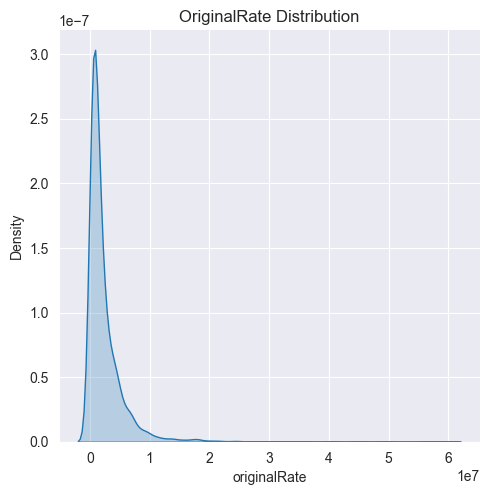

In [30]:
# OriginalRate Statistics
print('OriginalRate')
print(f'maximum value : {df.originalRate.max()}')
print(f'minimum value : {df.originalRate.min()}')
print(f'skew value : {round(df.originalRate.skew(), 2)}')

# OriginalRate Distribution
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10), dpi=80)
sns.displot(df,x="originalRate", kind="kde", fill=True).set(title='OriginalRate Distribution')
plt.show()

In [31]:
# Remove outlier in OriginalRate
df_len = len(df)
df = iqr_outlier(df, 'originalRate')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(f'Total data : {df.shape[0]}')

Deleted row : 396
Total data : 4525


OriginalRate
maximum value : 6400397
minimum value : 40313
skew value : 1.26


<Figure size 1600x800 with 0 Axes>

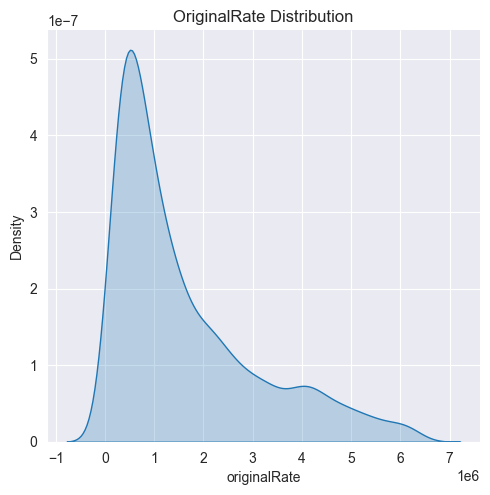

In [32]:
# OriginalRate Statistics
print('OriginalRate')
print(f'maximum value : {df.originalRate.max()}')
print(f'minimum value : {df.originalRate.min()}')
print(f'skew value : {round(df.originalRate.skew(), 2)}')

# OriginalRate Distribution after removing outlier
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.displot(df,x="originalRate", kind="kde", fill=True).set(title='OriginalRate Distribution')
plt.show()

#### OriginalRate based on starRating

OriginalRate Distribution by starRating
4.0    1420
3.0    1343
0.0     668
5.0     441
2.0     413
1.0     214
3.5      17
4.5       6
1.5       3
Name: starRating, dtype: int64


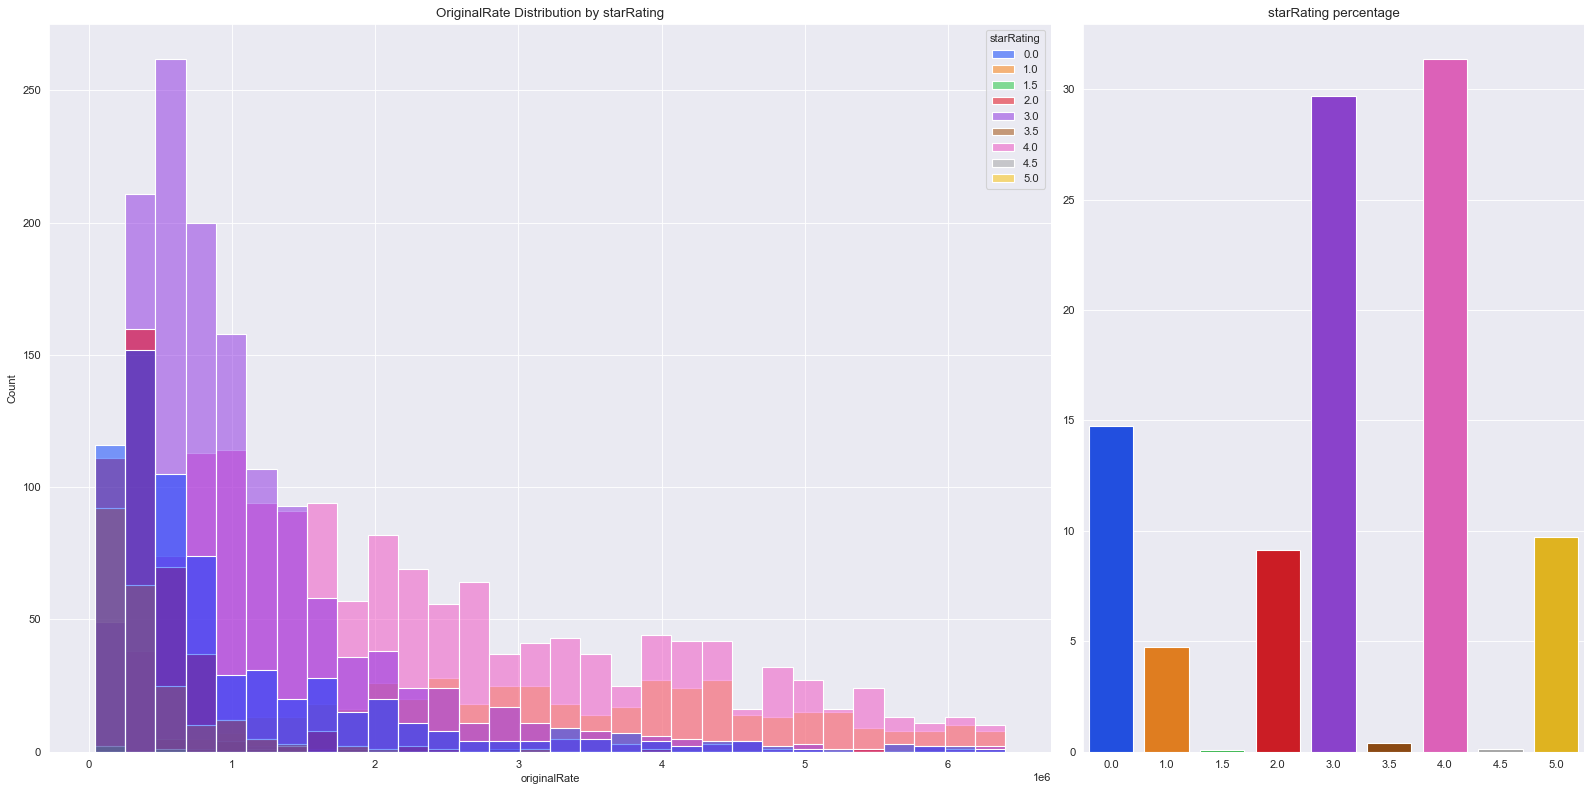

In [33]:
# starRating Distribution
value = df.starRating.value_counts()

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

print('OriginalRate Distribution by starRating')
print(value)

fig, ax = plt.subplots(1,2, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df,x="originalRate", hue='starRating' ,palette='bright', ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values, palette='bright', ax=ax[1]).set(title='starRating percentage')

fig.tight_layout()


#### Size Distribution 

Size
maximum value : 36000.0
minimum value : 2.0
skew value : 35.50827824484883


<Figure size 1600x800 with 0 Axes>

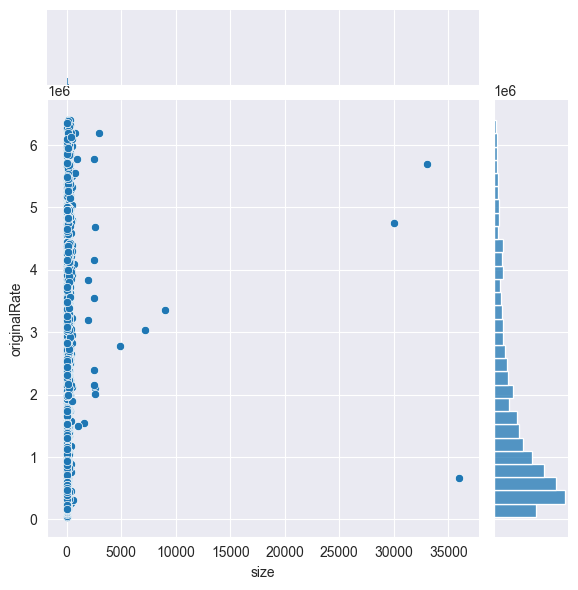

In [34]:
# Size Statistics
print('Size')
print('maximum value : {}'.format(df['size'].max()))
print('minimum value : {}'.format(df['size'].min()))
print('skew value : {}'.format(df['size'].skew()))

# Size Distribution plot
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [35]:
df_len = len(df)
df = iqr_outlier(df, 'size')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(df.shape)

Deleted row : 626
(3899, 15)


Size
maximum value : 99.0
minimum value : 2.0
skew value : 1.1688944757017654


<Figure size 1600x800 with 0 Axes>

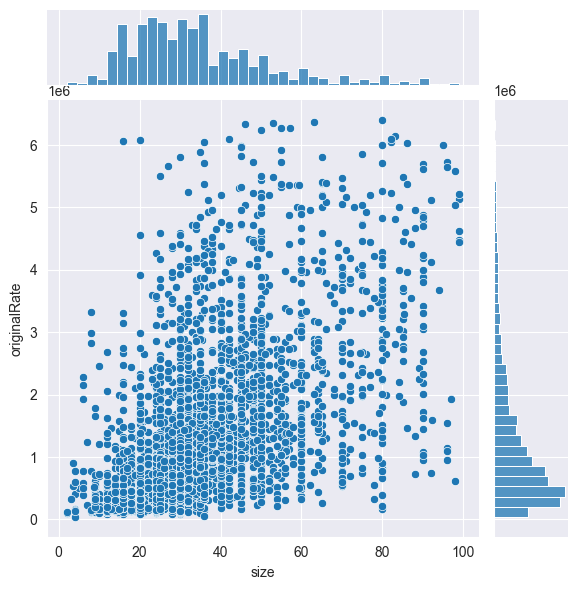

In [36]:
# Size Statistics
print('Size')
print('maximum value : {}'.format(df['size'].max()))
print('minimum value : {}'.format(df['size'].min()))
print('skew value : {}'.format(df['size'].skew()))

# Size Distribution plot
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [37]:
# Output total deleted rows
print(f'Total rows : {df.shape[0]}')
print(f'Total deleted rows : {originalRows - df.shape[0]}')

Total rows : 3899
Total deleted rows : 1060


## Export Data to CSV

In [38]:
df.to_csv('../Dataset/clean_data.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 4958
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     3899 non-null   object 
 1   city                     3899 non-null   object 
 2   hotelFacilities          3899 non-null   object 
 3   nearestPointOfInterests  3899 non-null   object 
 4   starRating               3899 non-null   float64
 5   size                     3899 non-null   float64
 6   originalRate             3899 non-null   int32  
 7   baseOccupancy            3899 non-null   int64  
 8   maxChildOccupancy        3899 non-null   int64  
 9   maxChildAge              3899 non-null   int64  
 10  isBreakfastIncluded      3899 non-null   int64  
 11  isWifiIncluded           3899 non-null   int64  
 12  isRefundable             3899 non-null   int64  
 13  hasLivingRoom            3899 non-null   int64  
 14  roomFacilities          